In [1]:
import os
working_dir = os.getcwd()
print working_dir
os.chdir('..')
from ml_helpers import *
os.chdir(working_dir)

/home/dadmin/Desktop/machine-learning-supervised/titantic


In [2]:
#get the data
import pandas as pd
import urllib, os

tdata_dir = '../data/titantic'

ttrain_data = pd.read_csv(tdata_dir + '/train.csv')
ttrain_data.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [3]:
ttrain_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


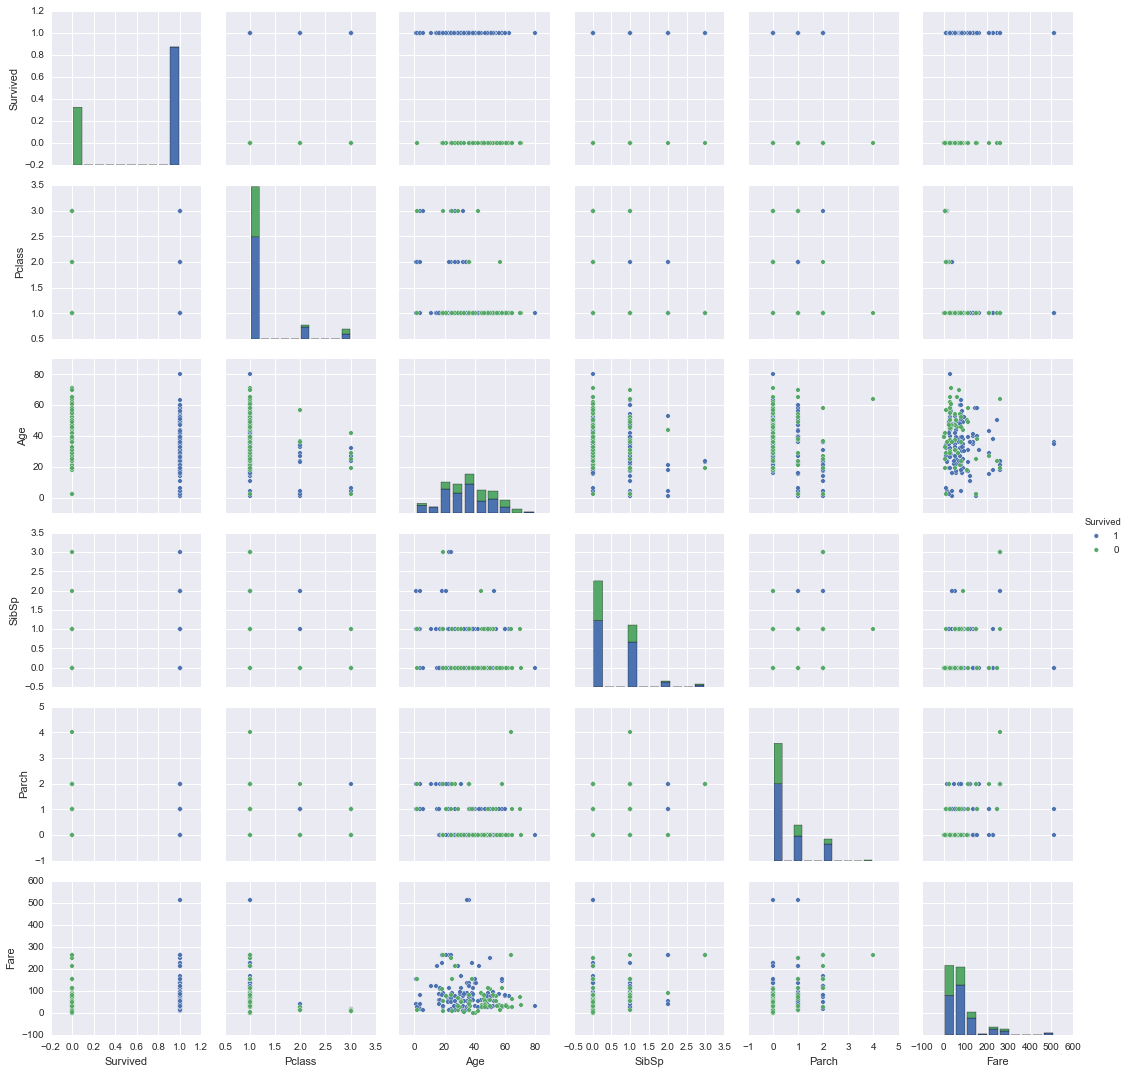

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

# sb.pairplot(ttrain_data.iloc() , hue='Survived')
titantic_pair_plot = sb.pairplot(ttrain_data.iloc[:,1:].dropna(), hue='Survived')

In [20]:
ttrain_data.loc[1,:]

PassengerId                                                    2
Survived                                                       1
Pclass                                                         1
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...
Sex                                                       female
Age                                                           38
SibSp                                                          1
Parch                                                          0
Ticket                                                  PC 17599
Fare                                                     71.2833
Cabin                                                        C85
Embarked                                                       C
Name: 1, dtype: object

In [21]:
data = ttrain_data.copy()

In [22]:
def replace_missing_values_with_mean(df, col, query, round=True):
    mean = df.query(query)

In [62]:
pclass1_average_age = data.loc[data['Pclass'] == 1, 'Age'].mean()
pclass2_average_age = data.loc[data['Pclass'] == 2, 'Age'].mean()
pclass3_average_age = data.loc[data['Pclass'] == 3, 'Age'].mean()

print 'Average Age of Pclass1 = {0:.3f}'.format(pclass1_average_age)
print 'Average Age of Pclass2 = {0:.3f}'.format(pclass2_average_age)
print 'Average Age of Pclass3 = {0:.3f}'.format(pclass3_average_age)

Average Age of Pclass1 = 38.201
Average Age of Pclass2 = 29.885
Average Age of Pclass3 = 25.102


In [63]:
# fill ages for people with missing values from the mean

data.loc[(data['Pclass'] == 1) &
               (data['Age'].isnull()), 'Age'] = round(pclass1_average_age)

data.loc[(data['Pclass'] == 2) &
               (data['Age'].isnull()), 'Age'] = round(pclass2_average_age)

data.loc[(data['Pclass'] == 3) &
               (data['Age'].isnull()), 'Age'] = round(pclass3_average_age)


In [64]:
assert len( data.loc[data['Age'].isnull(),:] ) == 0 

In [65]:
data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,25,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [66]:
all_inputs_raw = data.iloc[:,[2,4,5,6,7,9,11]].values
all_inputs_raw[1]

array([1, 'female', 38.0, 1, 0, 71.2833, 'C'], dtype=object)

In [67]:
from sklearn.preprocessing import label_binarize
all_inputs_raw[:,1] = label_binarize(all_inputs_raw[:,1], classes=[ 'female', 'male']).T


In [68]:
all_inputs_raw

array([[3, 1, 22.0, ..., 0, 7.25, 'S'],
       [1, 0, 38.0, ..., 0, 71.2833, 'C'],
       [3, 0, 26.0, ..., 0, 7.925, 'S'],
       ..., 
       [3, 0, 25.0, ..., 2, 23.45, 'S'],
       [1, 1, 26.0, ..., 0, 30.0, 'C'],
       [3, 1, 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [72]:
import numpy as np
embarked_array = label_binarize(all_inputs_raw[:,6], classes=[ 'S', 'C', 'Q'])
all_inputs = np.hstack(( all_inputs_raw[:,0:6] , embarked_array ))
all_inputs[0:5]

array([[3, 1, 22.0, 1, 0, 7.25, 1, 0, 0],
       [1, 0, 38.0, 1, 0, 71.2833, 0, 1, 0],
       [3, 0, 26.0, 0, 0, 7.925, 1, 0, 0],
       [1, 0, 35.0, 1, 0, 53.1, 1, 0, 0],
       [3, 1, 35.0, 0, 0, 8.05, 1, 0, 0]], dtype=object)

In [70]:
all_classes = data.iloc[:,1].values
all_classes[0:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [71]:
from sklearn.cross_validation import train_test_split

(training_inputs,
testing_inputs,
training_classes,
testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75, random_state=1)

In [33]:
from sklearn.tree import DecisionTreeClassifier

#train the classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(training_inputs, training_classes)

#validate the classifier on the testing set
decision_tree_classifier.score(testing_inputs, testing_classes)

0.7488789237668162

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(testing_classes, decision_tree_classifier.predict(testing_inputs))

array([[109,  19],
       [ 37,  58]])

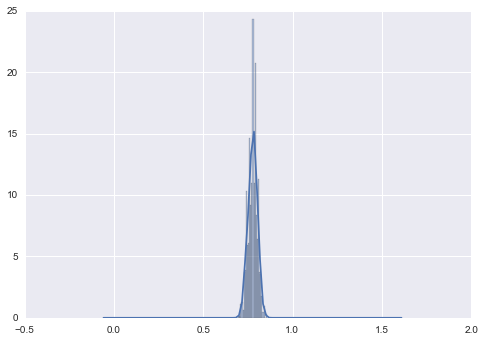

In [53]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
fig = sb.distplot(model_accuracies)

fig.get_figure().savefig('Titantic_decision_tree_accuracy_1000CV.png')


In [59]:
import sklearn.tree as tree
from sklearn.externals.six import StringIO
import pydot

with open('titantic_dt_noprune.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)
    dot_data = StringIO()
    tree.export_graphviz(decision_tree_classifier, out_file=dot_data)

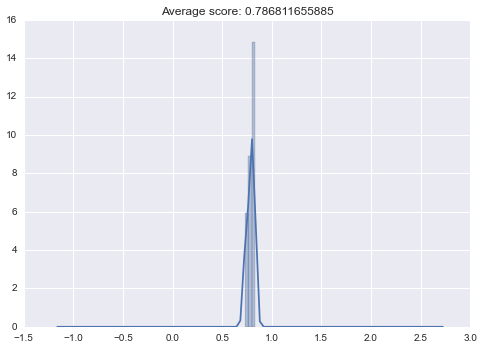

In [38]:
from sklearn.cross_validation import cross_val_score

decision_tree_classifier = DecisionTreeClassifier()

# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


In [39]:
from sklearn.grid_search import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'criterion': ['gini','entropy'],
                  'splitter': ['random', 'best'],
                 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 'max_features': [1,2,3,4,5,6,7,8,9]}

cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(decision_tree_classifier,
                        param_grid=parameter_grid,
                        cv=cross_validation)
grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.82379349046
Best parameters: {'max_features': 5, 'splitter': 'random', 'criterion': 'gini', 'max_depth': 9}


In [40]:
decision_tree_classifier = grid_search.best_estimator_
with open('titantic_dt_prune.dot', 'w') as out_file:
    out_file = tree.export_graphviz(decision_tree_classifier, out_file=out_file)

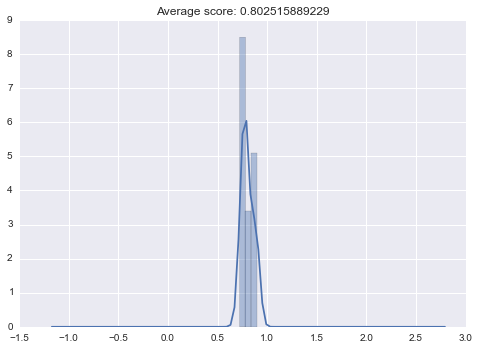

In [41]:
# cross_val_score returns a list of the scores, which we can visualize
# to get a reasonable estimate of our classifier's performance
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


In [51]:
grid_search.best_estimator_??


CPU times: user 248 ms, sys: 60 ms, total: 308 ms
Wall time: 1.4 s
train test sizes: [ 80 160 240 320 400 480 560 640 720 801]
train scores means: [ 0.97125     0.926875    0.90291667  0.89        0.892       0.89020833
  0.88339286  0.8721875   0.87625     0.87490637]
train scores std: [ 0.01681703  0.0111978   0.01149426  0.01116286  0.014089    0.00945797
  0.00934903  0.01        0.00850404  0.00563322]
test scores mean: [ 0.7431787   0.77682386  0.77445097  0.78788475  0.78339008  0.78571246
  0.80587533  0.77792333  0.81376575  0.80809868]
test scores std: [ 0.05637932  0.04781448  0.04059948  0.02473429  0.03055305  0.03048431
  0.03486261  0.05615349  0.03549176  0.03768777]


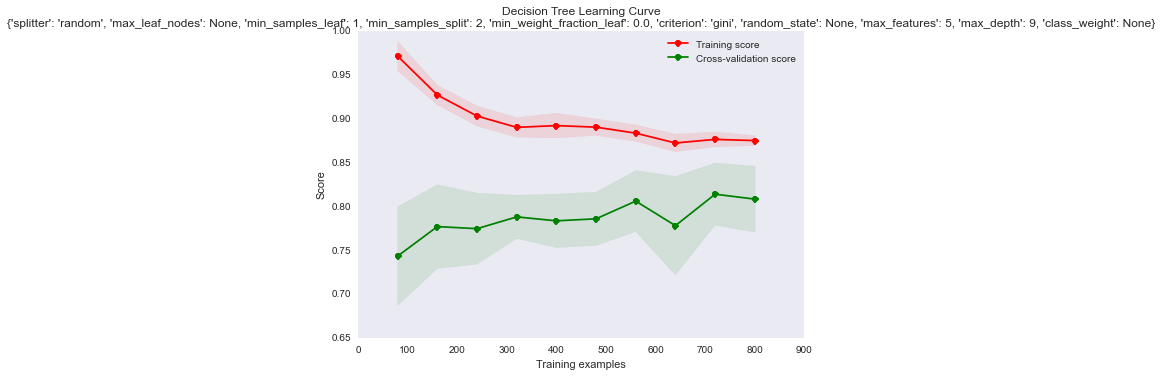

In [49]:

decision_tree_classifier = grid_search.best_estimator_

%time lc_output = make_learning_curve(decision_tree_classifier, all_inputs, all_classes, cv=10)

dt_lc_plot = plot_learning_curve_from_learning_curve_data('Decision Tree Learning Curve\n{}'.format(grid_search.best_estimator_.get_params()), *lc_output)

In [ ]:
# TODO - make violin plots with this data

## boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    ada_boost_classifier = AdaBoostClassifier()
    ada_boost_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = ada_boost_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

In [ ]:
ada_boost_classifier = AdaBoostClassifier()
cv_scores = cross_val_score(ada_boost_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


In [ ]:
ada_boost_classifier = AdaBoostClassifier()
parameter_grid = {'n_estimators': [10,25,50,75,100,200,300],
                 'learning_rate': [0.01,0.1,1,2,5],
                 'algorithm': ['SAMME', 'SAMME.R']}
                                
cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(ada_boost_classifier,
                        param_grid=parameter_grid,
                        cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
ada_boost_classifier = grid_search.best_estimator_
cv_scores = cross_val_score(ada_boost_classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_features=9, splitter='random', criterion='entropy', max_depth=8)
ada_boost_classifier = AdaBoostClassifier( base_estimator=base_classifier, **grid_search.best_params_)

%time boost_lc_output = make_learning_curve(decision_tree_classifier, all_inputs, all_classes)
boost_lc_plot = plot_learning_curve_from_learning_curve_data('AdaBoosted Decision Tree Learning Curve', *lc_output)

In [ ]:
from sklearn.metrics import classification_report



print("")

## Neural nets

In [ ]:
from sknn.mlp import Classifier, Layer  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


pipeline = Pipeline([
        ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('neural network', mlp.Classifier(layers=[Layer("Softmax")], n_iter=50))
    ])

# pipeline.fit(all_inpute, all_classes)


cv_scores = cross_val_score(pipeline, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))


In [ ]:
from scipy import stats

from sknn.mlp import Classifier, Layer  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import RandomizedSearchCV

# pipeline = Pipeline([
#         ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
#         ('neural network', Classifier)
#     ])

nn = Classifier(layers=[Layer('Rectifier'),Layer("Softmax")], n_iter=25)

nn_inputs = MinMaxScaler().fit_transform(all_inputs)


rs = RandomizedSearchCV(nn, param_distributions={
    'learning_rate': stats.uniform(0.001, 0.05),
    'hidden0__units': stats.randint(2, 12),
    'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
    'regularize':["L2",'']})

# pipeline.fit(all_inpute, all_classes)
rs.fit(nn_inputs, all_classes)

print('Best score: {}'.format(rs.best_score_))
print('Best parameters: {}'.format(rs.best_params_))

# cv_scores = cross_val_score(pipeline, all_inputs, all_classes, cv=10)
# sb.distplot(cv_scores)
# plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
from scipy import stats

from sknn.mlp import Classifier, Layer  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import RandomizedSearchCV



# pipeline = Pipeline([
#         ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
#         ('neural network', Classifier)
#     ])

nn = Classifier(layers=[Layer('Rectifier'),Layer("Softmax")], n_iter=50)

nn_inputs = MinMaxScaler().fit_transform(all_inputs)


rs = RandomizedSearchCV(nn, param_distributions={
    'learning_rate': stats.uniform(0.001, 0.05),
    'hidden0__units': stats.randint(2, 12),
    'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
    'regularize':["L2",'']})

# pipeline.fit(all_inpute, all_classes)
rs.fit(nn_inputs, all_classes)

print('Best score: {}'.format(rs.best_score_))
print('Best parameters: {}'.format(rs.best_params_))

# cv_scores = cross_val_score(pipeline, all_inputs, all_classes, cv=10)
# sb.distplot(cv_scores)
# plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
from scipy import stats

from sknn.mlp import Classifier, Layer  

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.grid_search import RandomizedSearchCV

# pipeline = Pipeline([
#         ('min/max scalar', MinMaxScaler(feature_range=(0.0, 1.0))),
#         ('neural network', Classifier)
#     ])

nn = Classifier(layers=[Layer('Rectifier')
                        Layer('Rectifier'),
                        Layer("Softmax")], n_iter=100)

nn_inputs = MinMaxScaler().fit_transform(all_inputs)


rs = RandomizedSearchCV(nn, param_distributions={
    'learning_rate': stats.uniform(0.001, 0.05),
    'hidden0__units': stats.randint(2, 12),
    'hidden0__type': ["Rectifier", "Sigmoid", "Tanh"],
    'regularize':["L2",'']})

# pipeline.fit(all_inpute, all_classes)
rs.fit(nn_inputs, all_classes)

print('Best score: {}'.format(rs.best_score_))
print('Best parameters: {}'.format(rs.best_params_))


In [ ]:
classifier = rs.best_estimator_
cv_scores = cross_val_score(classifier, nn_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
nn_classifier = rs.best_estimator_

%time nn_lc_output = make_learning_curve(nn_classifier, nn_inputs, all_classes, cv=5)
nn_lc_plot = plot_learning_curve_from_learning_curve_data('Neural Net Decision Tree Learning Curve', *lc_output)

## K-nearest neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    classifier = KNeighborsClassifier()
    classifier.fit(training_inputs, training_classes)
    classifier_accuracy = classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)


In [ ]:
classifier = KNeighborsClassifier()
parameter_grid = {'n_neighbors': [2,5,10,20,30,50,100],
                 'weights': ['uniform','distance'],
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                 'leaf_size': [1,5,10,20,30,50,100]}
                                
cross_validation = StratifiedKFold(all_classes, n_folds=10)

grid_search = GridSearchCV(classifier,
                        param_grid=parameter_grid,
                        cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
classifier = grid_search.best_estimator_
cv_scores = cross_val_score(classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
knn_classifier = KNeighborsClassifier(**grid_search.best_params_)

%time knn_lc_output = make_learning_curve(decision_tree_classifier, all_inputs, all_classes)
knn_lc_plot = plot_learning_curve_from_learning_curve_data('AdaBoosted Decision Tree Learning Curve', *lc_output)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_classes, train_size=0.75)
    
    classifier = SVC()
    classifier.fit(training_inputs, training_classes)
    classifier_accuracy = classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
    
sb.distplot(model_accuracies)

In [ ]:
SVC?

In [ ]:
classifier = SVC()
parameter_grid = {'C': [.1,.5,1],#,2,5],
                 'kernel': ['rbf','linear',],# 'poly', 'sigmoid', 'precomputed'],
                 'degree': [2,3,4],#,5,6],
                 'probability': [True, False]}
                                
cross_validation = StratifiedKFold(all_classes, n_folds=10)

%time grid_search = GridSearchCV(classifier, param_grid=parameter_grid, cv=cross_validation)

grid_search.fit(all_inputs, all_classes)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

In [ ]:
classifier = grid_search.best_estimator_
cv_scores = cross_val_score(classifier, all_inputs, all_classes, cv=10)
sb.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))

In [ ]:
svn_classifier = KNeighborsClassifier(**grid_search.best_params_)

%time svn_lc_output = make_learning_curve(decision_tree_classifier, all_inputs, all_classes)
svn_lc_plot = plot_learning_curve_from_learning_curve_data('SVN Learning Curve', *lc_output)